# Step 1: Installation and Setup

In [ ]:
#install tensorflow
import tensorflow as tf
print(tf.__version__)

2.4.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Data Preprocessing

In [ ]:
#Importing dataset
from tensorflow.keras.datasets import fashion_mnist 

In [ ]:
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [ ]:
 np.max(x_train), np.min(x_train), np.mean(x_train)

(255, 0, 72.94035223214286)

In [ ]:
 np.max(y_train), np.min(y_train)

(9, 0)

In [ ]:
class_names=["0 T-shirt/top",
"1 Trouser",
"2 Pullover",
"3 Dress",
"4 Coat",
"5 Sandal",
"6 Shirt",
"7 Sneaker",
"8 Bag",
"9 Ankle boot"]
print(class_names)

['0 T-shirt/top', '1 Trouser', '2 Pullover', '3 Dress', '4 Coat', '5 Sandal', '6 Shirt', '7 Sneaker', '8 Bag', '9 Ankle boot']


# Data exploration

0


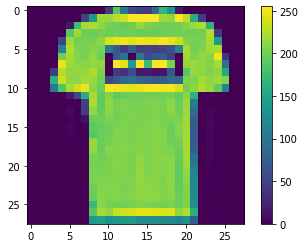

In [ ]:
plt.figure()
plt.imshow(x_train[1])
print(y_train[1])
plt.colorbar()

In [ ]:
#normalizing dataset - NN learns faster
x_train = x_train/255.0
x_test = x_test/255.0

0


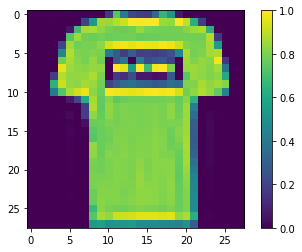

In [ ]:
plt.figure()
plt.imshow(x_train[1])
print(y_train[1])
plt.colorbar()

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
#flattening - create two dimension array (28*28) into one dimension vector(784)
x_train=x_train.reshape(-1,28*28)
x_test=x_test.reshape(-1,28*28)

In [ ]:
x_train.shape

(60000, 784)

# Step 3: Building the Model

In [ ]:
#Define the model
model = tf.keras.models.Sequential() #creating a sequence of layers

In [ ]:
#adding first fully connected hidden layer
#Need 3 parameters:-
#1) units(no. of neurons) =128 {you can choose as best fit as per circumstance}
#2) activation function = ReLU
#3) input shape = 784
model.add(tf.keras.layers.Dense(units=128,activation='relu',input_shape=(784,)))

In [ ]:
#Adding second layer with dropout 
#dropout=regularization technique
#randomly selected neurons are not considered in forward/backward propogation
#needed to prevent overfitting, prevent ML from overlearning
model.add(tf.keras.layers.Dropout(0.3)) #drops 30% neurons

In [ ]:
#adding output layer
#1)units = 10 {because 10 classes in Output e.g tshirt,trousers ..}
#2)activation = softmax (since it is multiclassification its softmax, if binary output we would use sigmoid)
model.add(tf.keras.layers.Dense(units=10,activation='softmax'))

# Step 4:Training the Model

In [ ]:
# Compiling the model
# 1) Optimizer = adam (minimize the loss function)
# 2) loss function = sparse_categorical_crossentropy (acts as guide to optimizer)
# 3)metrics = sparse_categorical_accuracy (since many outputs, otherwise for binary only outputs we use accuracy)
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['sparse_categorical_accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Training the model
model.fit(x_train,y_train,epochs=10) #epochs no. of time we are training model

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7189 - sparse_categorical_accuracy: 0.7481
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4304 - sparse_categorical_accuracy: 0.8462
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3922 - sparse_categorical_accuracy: 0.8587
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3643 - sparse_categorical_accuracy: 0.8663
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3484 - sparse_categorical_accuracy: 0.8710
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3436 - sparse_categorical_accuracy: 0.8735
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3292 - sparse_categorical_accuracy: 0.8791
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3224 - sparse_categorical_accuracy: 0.8810
Epoch 9/10
1875/1875 [==========

In [ ]:
#loss=0.3099
#accuracy=0.8855

# Step 5: Model Evaluation and Prediction

In [ ]:
#model evaluation
test_loss, test_accuracy = model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3380 - sparse_categorical_accuracy: 0.8785


In [ ]:
print("Test accuracy is {}".format(test_accuracy))

Test accuracy is 0.8784999847412109


In [ ]:
#loss=0.3380
#accuracy=0.8784999847412109

In [ ]:
#model prediction
y_pred=model.predict_classes(x_test)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
print(y_pred)

[9 2 1 ... 8 1 5]


In [ ]:
y_pred[30],y_test[30]  #predicted output and  #actual output

(8, 8)

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print(cm)

[[802   0  18  37   4   1 132   0   6   0]
 [  2 968   1  22   3   0   4   0   0   0]
 [ 12   1 745  14 147   0  81   0   0   0]
 [ 21   5  12 889  38   0  31   0   3   1]
 [  0   0  76  28 846   0  49   0   1   0]
 [  0   0   0   0   0 963   0  21   1  15]
 [ 94   1  90  31  86   0 689   0   9   0]
 [  0   0   0   0   0  15   0 971   0  14]
 [  3   0   5   4   5   5   8   4 966   0]
 [  0   0   0   0   0   3   1  50   0 946]]


In [ ]:
acc_cm=accuracy_score(y_test, y_pred)
print(acc_cm)

0.8785
